# Analysis of $x_{n+1} = r x_n (1 - x_n)$

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)

In [38]:
def x(n, x_0, r):
    if n == 0:
        return x_0
    else:
        prev_x = x(n-1, x_0, r)
        return r * prev_x * (1 - prev_x)

In [39]:
def x_progress(n, x_0, r):
    series = []
    prev_x = x_0
    for i in range(n):
        curr_x = r * prev_x * (1 - prev_x)
        series.append(prev_x)
        prev_x = curr_x
    return series

In [81]:
def plot_dynamics(n, r, x_0=[0.01, 0.05, 0.2, 0.5, 0.7]):
    time = np.arange(0, n, 1)
    plt.xlabel("Time Step n")
    plt.ylabel("Population")
    plt.title(f"r = {r}")
    for val in x_0:
        x_t = x_progress(n, val, r)
        plt.plot(time, x_t, label=f"x_0 = {val}")
    plt.legend()
    plt.savefig(f"steady_state:r={r}.png", dpi=400)

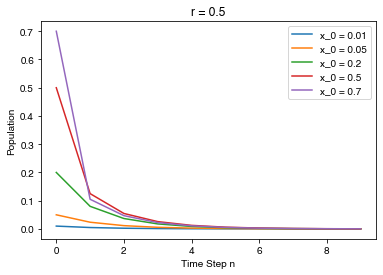

In [82]:
plot_dynamics(10, r=0.5)

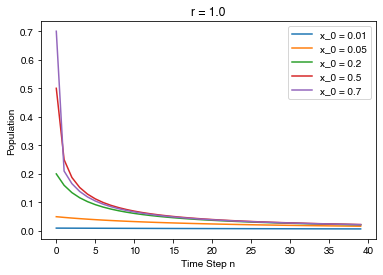

In [85]:
plot_dynamics(40, r=1.0)

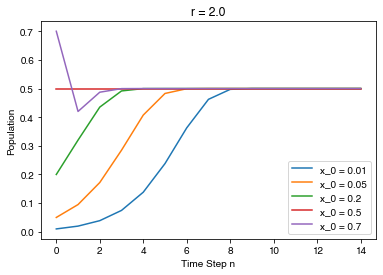

In [89]:
plot_dynamics(15, r=2.0)

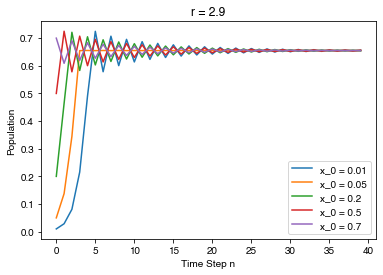

In [91]:
plot_dynamics(40, r=2.9)

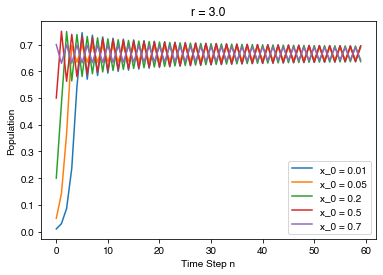

In [114]:
plot_dynamics(60, r=3.0)

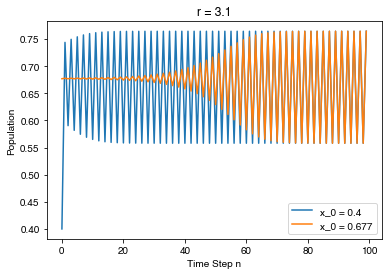

In [130]:
plot_dynamics(100, r=3.1, x_0=[0.4, 0.677])

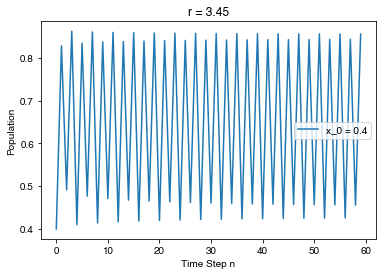

In [133]:
plot_dynamics(60, r=3.45, x_0=[0.4])

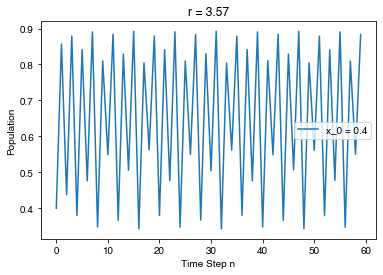

In [147]:
plot_dynamics(60, r=3.57, x_0=[0.4])

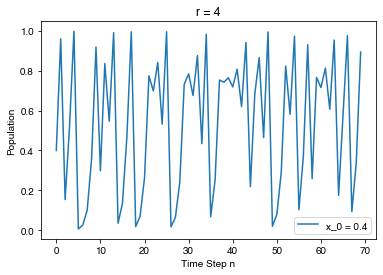

In [146]:
plot_dynamics(70, r=4, x_0=[0.4])

## Interactive plot

In [73]:
from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [74]:
num_iter = 500
x_0 = 0.2
r = 2.9
times = np.arange(0, num_iter, 1)
x_t = x_progress(num_iter, x_0, r)

In [75]:
# Bokeh initial settings
source = ColumnDataSource(data=dict(x=times, y=x_t))
plot = figure(title="Dynamic Systems", x_axis_label="time", y_axis_label="x value",
        y_range=(0, 1), plot_width=800, plot_height=400)

plot.line('x', 'y', source=source, line_width=0.5, line_alpha=0.7)

GlyphRenderer(id='1039', ...)

In [76]:
# Define sliders
r_slider = Slider(start=0.0, end=10.0, value=2.9, step=.05, title="r")
x_0_slider = Slider(start=0, end=1, value=0.1, step=0.01, title="initial x value")

In [77]:
# JavaScript callbacks are used to render updated figures
callback = CustomJS(args=dict(source=source, r=r_slider, x_0=x_0_slider),
        code="""
        const data = source.data;
        const R = r.value;
        const t = data['x'];
        const x = data['y'];
        
        x[0] = x_0.value;
        for (var i = 1; i < t.length; i++) {
            x[i] = R * x[i-1] * (1 - x[i-1]);
        }
        source.change.emit();
    """)

In [78]:
# Final layouting
r_slider.js_on_change('value', callback)
x_0_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(r_slider, x_0_slider),
)

show(layout)

## Visualize the Chaos!!

In [117]:
rs = np.arange(2, 4, 0.001)
def x_periods(num_periods):
    xs = []
    for i in range(num_periods):
        xs.append(list(map(lambda r: x(1000 + i, 0.2, r), rs)))
    return xs

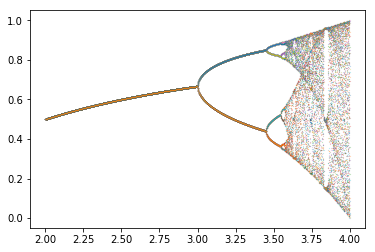

In [118]:
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.3
mpl.rcParams['lines.markersize'] = 0.1
for x_series in x_periods(32):
    plt.scatter(rs, x_series)
plt.savefig('final_state.png', dpi=800)